**This is an Exploratory Data Analysis and Visualisation project on the Movie dataset <br />
  Name of dataset: Movie Industry - Three decades of movies <br />
  Source of dataset: https://www.kaggle.com/danielgrijalvas/movies <br />
  <br />
  This project will be focusing on answering the following questions: <br />
  1.What are the elements that are correlated to the gross earnings of the movies <br />
  <br />**
  

Setting up the environment
1. Importing the relevant packages
2. Importing data from the file into data frame

In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
# Adjusts the configuration of the plots
matplotlib.rcParams['figure.figsize'] = (12,8) 

# To control visual output
#pd.set_option('display.max_rows',15)

In [2]:
# Importing data from file
folder_path = "C:/Users/wilso/OneDrive/Desktop/Portfolio_Project/Datasets"
file = 'movies.csv'

df = pd.read_csv(folder_path + "/" + file)

Getting an initial feel of the data
1. Look at the first 5 rows of data
2. Getting indepth information for the data (Data types, number of rows, number of non-null)
3. Identify how much data are missing for each column
4. Look at the number of unique values for each column
5. Looking at the column names

In [19]:
# Initial look at the data

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_released
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [20]:
# To see detailed information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   budget         6820 non-null   int64  
 1   company        6820 non-null   object 
 2   country        6820 non-null   object 
 3   director       6820 non-null   object 
 4   genre          6820 non-null   object 
 5   gross          6820 non-null   int64  
 6   name           6820 non-null   object 
 7   rating         6820 non-null   object 
 8   released       6820 non-null   object 
 9   runtime        6820 non-null   int64  
 10  score          6820 non-null   float64
 11  star           6820 non-null   object 
 12  votes          6820 non-null   int64  
 13  writer         6820 non-null   object 
 14  year           6820 non-null   int64  
 15  year_released  6820 non-null   object 
dtypes: float64(1), int64(5), object(10)
memory usage: 852.6+ KB


In [4]:
# To check for missing data
# Perform a loop through the data to get the percentage of completeness

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing}%')
    

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [22]:
# To look at number of unique values in each column

df.nunique()

budget            351
company          2179
country            57
director         2759
genre              17
gross            6802
name             6731
rating             13
released         2403
runtime           135
score              75
star             2504
votes            6512
writer           4199
year               31
year_released      32
dtype: int64

In [24]:
df.columns

Index(['budget', 'company', 'country', 'director', 'genre', 'gross', 'name',
       'rating', 'released', 'runtime', 'score', 'star', 'votes', 'writer',
       'year', 'year_released'],
      dtype='object')

After doing the initial observation of the data, there are a few things that need to be done:

1. Changing data type for budget and gross profit from float to integer
2. Extract released year from the released date
3. Drop any duplicate entries within the data

In [6]:
# To change float into integer for visual presentation
# Removing the decimal from the figures

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [7]:
# Upon close inspection, the year column has some incorrect data
# To create the correct year column by extracting year from the released date instead

df['year_released'] = df['released'].astype(str).str[0:4]

In [8]:
# To drop any duplicates

df.drop_duplicates()

# To have a quick view of the data with the highest gross earning at the top

df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_released
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter N�ss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


Visualisation:
1. Scatterplot between gross earnings and budget 
2. Correlation between the features (Heatmap)
3. Dashboard: Countplot for genre, country, rating, year_released
4. Histogram for gross earnings



**To start off the analysis, we will start with the first assumption: More budget results in better gross earning. <br />
We will begin testing it with a scatter plot.**

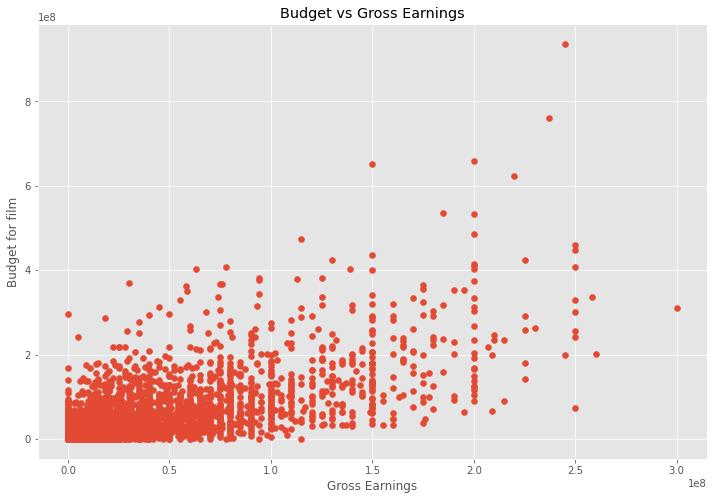

In [9]:
# To see the relationship between budget and gross earnings
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')

plt.show()

**Scatter plot seems to suggest correlation but to observe further, we can plot it with a correlation line.**

<AxesSubplot:xlabel='budget', ylabel='gross'>

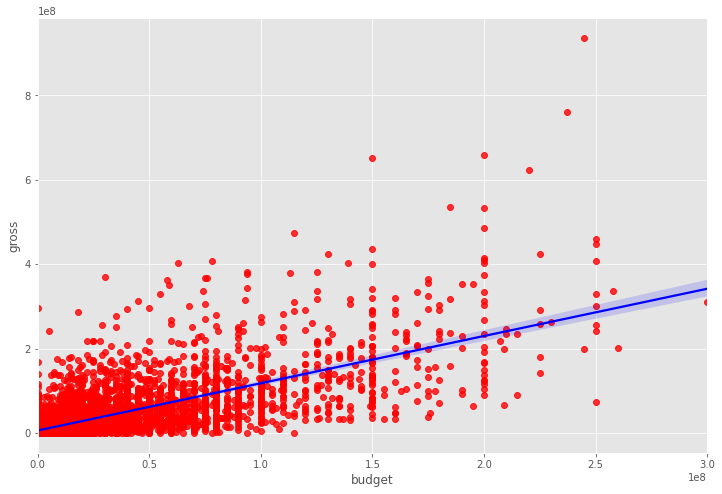

In [10]:
# To better visualise it with a correlation line
# Plot budget vs gross using seaborn

sns.regplot(x='budget',y='gross',data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

<AxesSubplot:xlabel='score', ylabel='gross'>

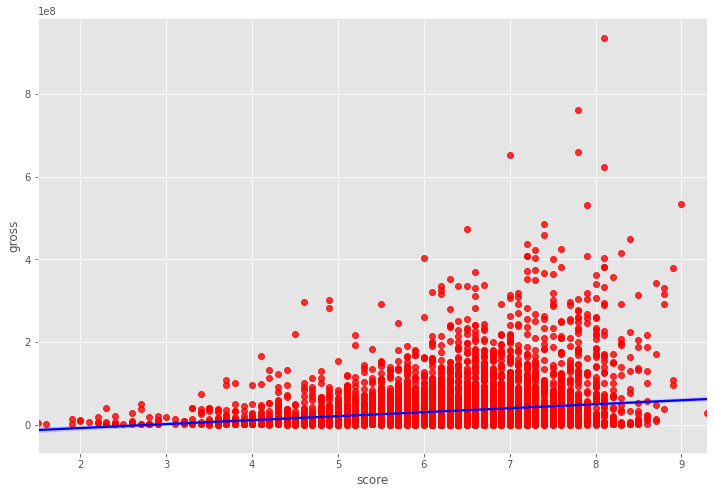

In [11]:
# Exploring another feature
# Plot score vs gross using seaborn

sns.regplot(x='score',y='gross',data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

**A strong correlation can be seen between gross earnings and budget while a much weaker correlation can be seen between gross earnings and score of the movie. <br />
This result is quite surprising as we will expect score of the movie to have a much stronger correlation to the gross earnings of the movie. <br />
Next we will plot the correlation of all the variables using a heatmap to seek out more insights.**

In [12]:
df.corr()

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


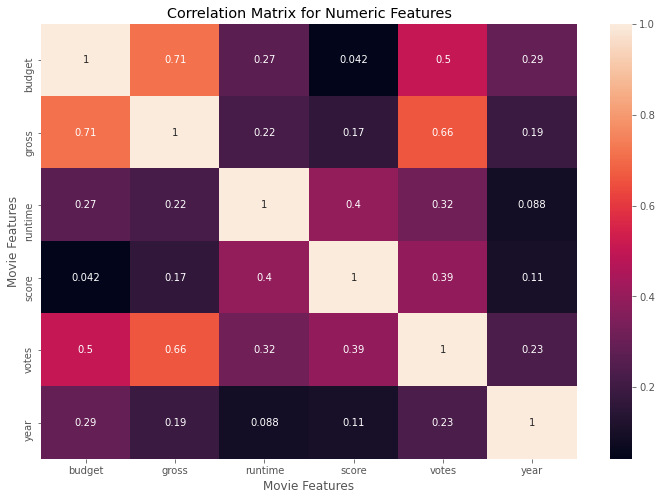

In [13]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

**The heatmap shows that apart from budget, the other feature that has a strong correlation to the gross earning is votes.<br />
Going by that train of thoughts, it will be interesting to see if other feature like company that produce the movie matters.<br />
As company is an object type in this dataframe when observed before, there is a need to process the data before running the heatmap.**

In [14]:
# Duplicate the dataframe before performing label encoding
df_2 = df.copy()

for col_name in df_2.columns:
    if(df_2[col_name].dtype == 'object'):
        df_2[col_name]= df_2[col_name].astype('category')
        df_2[col_name] = df_2[col_name].cat.codes
df_2.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_released
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,1986,0
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,1986,0
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,1986,0
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,1986,0
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,1986,0


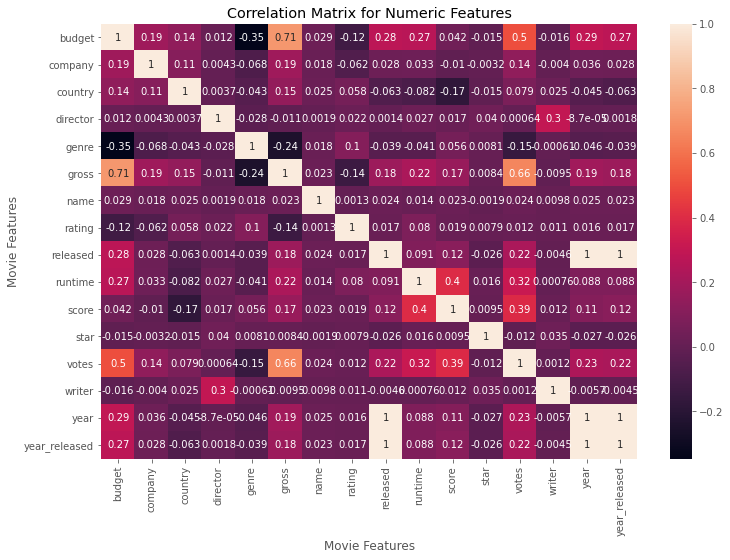

In [15]:
# Creating a heatmap based on the modified data
sns.heatmap(df_2.corr(),annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

**The revised heatmap provides much more insights but can be harder to pinpoint due to the number of features being compared. <br />
We can change it to another format and apply filter to get the features that has a strong correlation with other features.** 

In [16]:
corr_pairs = df_2.corr().unstack()

corr_pairs

budget         budget           1.000000
               company          0.187205
               country          0.137635
               director         0.011602
               genre           -0.346794
                                  ...   
year_released  star            -0.026052
               votes            0.220797
               writer          -0.004546
               year             0.996229
               year_released    1.000000
Length: 256, dtype: float64

In [17]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

sorted_pairs

genre          budget          -0.346794
budget         genre           -0.346794
gross          genre           -0.242676
genre          gross           -0.242676
score          country         -0.174414
                                  ...   
director       director         1.000000
country        country          1.000000
company        company          1.000000
year           year             1.000000
year_released  year_released    1.000000
Length: 256, dtype: float64

In [18]:
# To return results that shows high correlation regardless of positive or negative
# Filter out correlations that are strong(Above 0.5) and remove own correlation(Equal 1)

strong_pairs = sorted_pairs[(abs(sorted_pairs) > 0.5)&(sorted_pairs<1)]

print(strong_pairs)

votes          budget           0.503924
budget         votes            0.503924
votes          gross            0.662457
gross          votes            0.662457
               budget           0.712196
budget         gross            0.712196
released       year             0.996187
year           released         0.996187
year_released  year             0.996229
year           year_released    0.996229
year_released  released         0.999389
released       year_released    0.999389
dtype: float64


**By filtering the correlation by the 50% threshold and removing correlation with the same variable.
<br />
We can see that the variables that has meaningful correlation are: <br />
Budget of the movie and Votes received by the movie - 50.39% <br />
Gross earnings of the movie and Votes received by the movie - 66.25% <br />
Budget of the movie and Gross earnings of the movie - 71.22% <br />
<br />
The other correlations observed in the list are mainly due to the date and time extracted from the same variable hence it is not meaningful. <br />
<br />
It is interesting to see that factors like company,director and stars did not seems to have any meaningful correlation to the gross earnings of a movie. There might however be an indirect effect as a movie which has a higher budget tend to have a stronger production team.** 